In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_boston
boston = load_boston()


df_x = pd.DataFrame(boston.get('data'),columns=boston.get('feature_names'))
df_y = pd.DataFrame(boston.get('target'))
df_y = np.array(df_y)


In [2]:
df_x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
df_y[:10]

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9]])

In [5]:

#X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(df_x, df_y, test_size = 0.33, random_state = 5)

# Manual split data
X_train = df_x[:339]
X_test = df_x[339:]
Y_train = df_y[:339]
Y_test = df_y[339:]


In [7]:
print(X_train.shape)
#X_train.head()
print(type(X_train))
X_train

(339, 13)
<class 'pandas.core.frame.DataFrame'>


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.5380,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.4690,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.4690,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.4580,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.4580,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.4580,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.5240,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.5240,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.5240,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.5240,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [8]:
print(X_test.shape)
X_test.head()

(167, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
339,0.05497,0.0,5.19,0.0,0.515,5.985,45.4,4.8122,5.0,224.0,20.2,396.90,9.74
340,0.06151,0.0,5.19,0.0,0.515,5.968,58.5,4.8122,5.0,224.0,20.2,396.90,9.29
341,0.01301,35.0,1.52,0.0,0.442,7.241,49.3,7.0379,1.0,284.0,15.5,394.74,5.49
342,0.02498,0.0,1.89,0.0,0.518,6.540,59.7,6.2669,1.0,422.0,15.9,389.96,8.65
343,0.02543,55.0,3.78,0.0,0.484,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18


In [9]:
print(Y_train.shape)
Y_train[:10]

(339, 1)


array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9]])

In [10]:
print(Y_test.shape)
Y_test[:10]

(167, 1)


array([[19. ],
       [18.7],
       [32.7],
       [16.5],
       [23.9],
       [31.2],
       [17.5],
       [17.2],
       [23.1],
       [24.5]])

In [11]:
# Run Simple linear regression model
reg = linear_model.LinearRegression()
reg.fit(X_train,Y_train)
Y_predict = reg.predict(X_test)

print('In the classic problem of predicting house prices based on square footage, '
    + 'linear regression is visualized by fitting a straight line through a plot where the x-axis '
    + 'represents square footage and the y axis represents house price. In this example, I use 12 '
    + 'features to predict house prices so a different visualization is required.')


In the classic problem of predicting house prices based on square footage, linear regression is visualized by fitting a straight line through a plot where the x-axis represents square footage and the y axis represents house price. In this example, I use 12 features to predict house prices so a different visualization is required.


In [12]:
print(reg.coef_, '   ', reg.intercept_)   # Length of 12 features plus 1 target variable

[[ 1.24012773  0.01320467  0.02945732  0.76975506 -9.26604544  9.24803924
  -0.04684958 -0.98916853  0.11925733 -0.0142279  -0.65141413  0.01609597
  -0.09006353]]     [-12.9577808]


Below is a "Prices vs. Predicted Prices" plot. If my model predicted price perfectly for all data points, we would see a straight line. However, my model is not perfect.


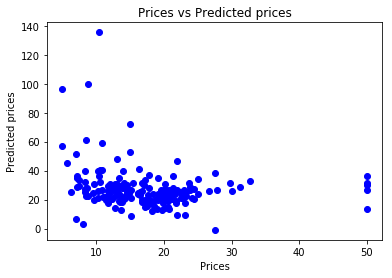

In [13]:
print('Below is a "Prices vs. Predicted Prices" plot. If my model predicted price perfectly '
    + 'for all data points, we would see a straight line. However, my model is not perfect.')

plt.scatter(Y_test, Y_predict, color='blue')
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [14]:
print('The squared mean error equation is one way of quantifying how accurate a linear regression model is.\n'
    + 'Put simply, it measures the average difference between the predicted value and the value in the training set. \n'
    + 'The higher the output, the less accurate the model is.')

error = np.mean((Y_predict - Y_test)**2)
print('Mean Squared Error: ' + str(error))
print('\n')

print('To verify I have calculated the error correctly, I use sklearns mean_squared_error function to see if I get the same result.')
error = mean_squared_error(Y_test, Y_predict)
print('Mean Squared Error: ' + str(error))

The squared mean error equation is one way of quantifying how accurate a linear regression model is.
Put simply, it measures the average difference between the predicted value and the value in the training set. 
The higher the output, the less accurate the model is.
Mean Squared Error: 457.423906751537


To verify I have calculated the error correctly, I use sklearns mean_squared_error function to see if I get the same result.
Mean Squared Error: 457.423906751537


I've noticed that my model is especially inaccurate when it comes to predicting the price of 
the most expensive houses in the dataset. As an experiment I'll try to feed the model the entire 
dataset to see if this trend lessens, or if more data will at least lower my mean squared error.





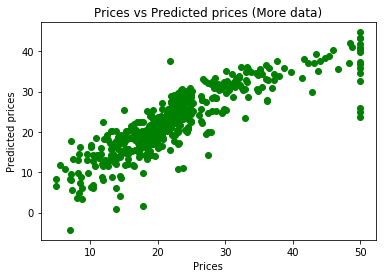

In [15]:
print("I've noticed that my model is especially inaccurate when it comes to predicting the price of \n"
    + "the most expensive houses in the dataset. As an experiment I'll try to feed the model the entire \n"
    + "dataset to see if this trend lessens, or if more data will at least lower my mean squared error.")
print('\n\n')

reg.fit(df_x,df_y)
Y_predict2 = reg.predict(df_x)
plt.scatter(df_y, Y_predict2, color='green')
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices (More data)")
plt.show()

In [16]:
error = np.mean((Y_predict2 - df_y)**2)
print('Mean Squared Error when model is trained using entire dataset: ' + str(error))

print("Judging by the graph above, adding more data has not made my model any better at predicting \n"
    + "the prices of the most expensive houses in the data set. However, it has made it a little more \n"
    + "accurate (judging by my reduced mean squared error)")


Mean Squared Error when model is trained using entire dataset: 21.894831181729202
Judging by the graph above, adding more data has not made my model any better at predicting 
the prices of the most expensive houses in the data set. However, it has made it a little more 
accurate (judging by my reduced mean squared error)


In [17]:
print("Update: Above, I have made a beginners mistake! While training the algorithm on the entire \n"
    + "dataset (rather then just the test set) will yield a lower error, it does not make for a better \n"
    + "algorithm. The point of checking the error on a test set is to see how well the algorithm can \n"
    + "predict values it has not seen before. By testing my algorithm on the entire dataset (training + test set), \n"
    + "I defeated the purpose of splitting the dataset in the first place.")

Update: Above, I have made a beginners mistake! While training the algorithm on the entire 
dataset (rather then just the test set) will yield a lower error, it does not make for a better 
algorithm. The point of checking the error on a test set is to see how well the algorithm can 
predict values it has not seen before. By testing my algorithm on the entire dataset (training + test set), 
I defeated the purpose of splitting the dataset in the first place.


----------------------------------------------------------------------------------------------------

In [18]:
df_x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [19]:
# Manual split data
def manually_split_data(df_x, df_y):
    X_train = df_x[:339]
    X_test = df_x[339:]
    Y_train = df_y[:339]
    Y_test = df_y[339:]
    return X_train, X_test, Y_train, Y_test


In [45]:
df_CRIM = df_x['CRIM']
df_ZN = df_x['ZN']
df_INDUS = df_x['INDUS']
df_CHAS = df_x['CHAS']
df_NOX = df_x['NOX']
df_RM = df_x['RM']
df_AGE = df_x['AGE']
df_DIS = df_x['DIS']
df_RAD = df_x['RAD']
df_TAX = df_x['TAX']
df_PTRATIO = df_x['PTRATIO']
df_B = df_x['B']
df_LSTAT = df_x['LSTAT']


In [46]:
X_train, X_test, Y_train, Y_test = manually_split_data(df_CRIM, df_y)

In [47]:
print(X_train.shape)
#X_train.head()
print(type(X_train))
X_train

(339,)
<class 'pandas.core.series.Series'>


0      0.00632
1      0.02731
2      0.02729
3      0.03237
4      0.06905
5      0.02985
6      0.08829
7      0.14455
8      0.21124
9      0.17004
10     0.22489
11     0.11747
12     0.09378
13     0.62976
14     0.63796
15     0.62739
16     1.05393
17     0.78420
18     0.80271
19     0.72580
20     1.25179
21     0.85204
22     1.23247
23     0.98843
24     0.75026
25     0.84054
26     0.67191
27     0.95577
28     0.77299
29     1.00245
        ...   
309    0.34940
310    2.63548
311    0.79041
312    0.26169
313    0.26938
314    0.36920
315    0.25356
316    0.31827
317    0.24522
318    0.40202
319    0.47547
320    0.16760
321    0.18159
322    0.35114
323    0.28392
324    0.34109
325    0.19186
326    0.30347
327    0.24103
328    0.06617
329    0.06724
330    0.04544
331    0.05023
332    0.03466
333    0.05083
334    0.03738
335    0.03961
336    0.03427
337    0.03041
338    0.03306
Name: CRIM, Length: 339, dtype: float64

In [58]:
print(X_test.shape)
#X_test.head()
print(type(X_test))
X_test

(167,)
<class 'pandas.core.series.Series'>


339     0.05497
340     0.06151
341     0.01301
342     0.02498
343     0.02543
344     0.03049
345     0.03113
346     0.06162
347     0.01870
348     0.01501
349     0.02899
350     0.06211
351     0.07950
352     0.07244
353     0.01709
354     0.04301
355     0.10659
356     8.98296
357     3.84970
358     5.20177
359     4.26131
360     4.54192
361     3.83684
362     3.67822
363     4.22239
364     3.47428
365     4.55587
366     3.69695
367    13.52220
368     4.89822
         ...   
476     4.87141
477    15.02340
478    10.23300
479    14.33370
480     5.82401
481     5.70818
482     5.73116
483     2.81838
484     2.37857
485     3.67367
486     5.69175
487     4.83567
488     0.15086
489     0.18337
490     0.20746
491     0.10574
492     0.11132
493     0.17331
494     0.27957
495     0.17899
496     0.28960
497     0.26838
498     0.23912
499     0.17783
500     0.22438
501     0.06263
502     0.04527
503     0.06076
504     0.10959
505     0.04741
Name: CRIM, Length: 167,

In [59]:
print(Y_train.shape)
Y_train[:10]

(339, 1)


array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9]])

In [60]:
print(Y_test.shape)
Y_test[:10]

(167, 1)


array([[19. ],
       [18.7],
       [32.7],
       [16.5],
       [23.9],
       [31.2],
       [17.5],
       [17.2],
       [23.1],
       [24.5]])

In [61]:
X_train2 = np.array(X_train)
X_train2 = X_train2.reshape(-1, 1)
print(type(X_train2))
#X_train2 = X_train2.reshape(-1, 1)
X_train2

<class 'numpy.ndarray'>


array([[0.00632],
       [0.02731],
       [0.02729],
       [0.03237],
       [0.06905],
       [0.02985],
       [0.08829],
       [0.14455],
       [0.21124],
       [0.17004],
       [0.22489],
       [0.11747],
       [0.09378],
       [0.62976],
       [0.63796],
       [0.62739],
       [1.05393],
       [0.7842 ],
       [0.80271],
       [0.7258 ],
       [1.25179],
       [0.85204],
       [1.23247],
       [0.98843],
       [0.75026],
       [0.84054],
       [0.67191],
       [0.95577],
       [0.77299],
       [1.00245],
       [1.13081],
       [1.35472],
       [1.38799],
       [1.15172],
       [1.61282],
       [0.06417],
       [0.09744],
       [0.08014],
       [0.17505],
       [0.02763],
       [0.03359],
       [0.12744],
       [0.1415 ],
       [0.15936],
       [0.12269],
       [0.17142],
       [0.18836],
       [0.22927],
       [0.25387],
       [0.21977],
       [0.08873],
       [0.04337],
       [0.0536 ],
       [0.04981],
       [0.0136 ],
       [0.

In [63]:
X_test2 = np.array(X_test)
X_test2 = X_test2.reshape(-1, 1)
print(type(X_test2))
#X_test2 = X_test2.reshape(-1, 1)
X_test2

<class 'numpy.ndarray'>


array([[5.49700e-02],
       [6.15100e-02],
       [1.30100e-02],
       [2.49800e-02],
       [2.54300e-02],
       [3.04900e-02],
       [3.11300e-02],
       [6.16200e-02],
       [1.87000e-02],
       [1.50100e-02],
       [2.89900e-02],
       [6.21100e-02],
       [7.95000e-02],
       [7.24400e-02],
       [1.70900e-02],
       [4.30100e-02],
       [1.06590e-01],
       [8.98296e+00],
       [3.84970e+00],
       [5.20177e+00],
       [4.26131e+00],
       [4.54192e+00],
       [3.83684e+00],
       [3.67822e+00],
       [4.22239e+00],
       [3.47428e+00],
       [4.55587e+00],
       [3.69695e+00],
       [1.35222e+01],
       [4.89822e+00],
       [5.66998e+00],
       [6.53876e+00],
       [9.23230e+00],
       [8.26725e+00],
       [1.11081e+01],
       [1.84982e+01],
       [1.96091e+01],
       [1.52880e+01],
       [9.82349e+00],
       [2.36482e+01],
       [1.78667e+01],
       [8.89762e+01],
       [1.58744e+01],
       [9.18702e+00],
       [7.99248e+00],
       [2.

In [67]:
# Run Simple linear regression model
reg = linear_model.LinearRegression()
#X_train2 = np.array(X_train[0])
reg.fit(X_train2,Y_train)


Y_predict = reg.predict(X_test2)


In [68]:
print(reg.coef_, '   ', reg.intercept_)   # Length of 1 feature plus 1 target variable

[[-2.6560934]]     [26.243438]


Below is a "Prices vs. Predicted Prices" plot. If my model predicted price perfectly for all data points, we would see a straight line. However, my model is not perfect.


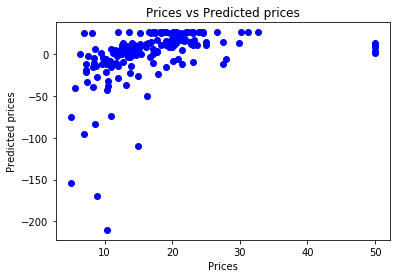

In [69]:
print('Below is a "Prices vs. Predicted Prices" plot. If my model predicted price perfectly '
    + 'for all data points, we would see a straight line. However, my model is not perfect.')

plt.scatter(Y_test, Y_predict, color='blue')
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()